# Sentiment Analysis
<ul>
    <li>Author: Samuel D'Avila</li>
</ul>

In [147]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import ReferenceArchitecture as rf
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data & Viewing the dataframes

In [148]:
df_titles_top100 = pd.read_csv("Top100ScrapedTitles.csv")
# df_combined_top100 = pd.read_csv("CombinedTop100Scrape.csv")
df_cleaned_title = pd.read_csv("CleanedTitleComments.csv")

In [149]:
df_titles_top100.head(3)

,Unnamed: 0,Title,Post Text,ID,Title Score,Total Comments,Post URL
0,0,"When someone really likes you, it’s effortless.",Just keep this in mind. They text you right aw...,sgcach,11302,508,https://www.reddit.com/r/dating_advice/comment...
1,1,My father told me this,\n\nMy father told me this when he walked up...,sseson,8905,256,https://www.reddit.com/r/dating_advice/comment...
2,2,He said yes! I'm finally got the first date of...,"UPDATE: Oh my god, I can't believe how many co...",sdvk7s,8482,504,https://www.reddit.com/r/dating_advice/comment...


In [150]:
df_cleaned_title.head(3)

,Unnamed: 0,Title,Post Text,ID,Title Score,Total Comments,Post URL,User,Body,Comment Score
0,0,someone really likes it’s effortless,keep mind text right away soon excited make pl...,sgcach,11302,508,https://www.reddit.com/r/dating_advice/comment...,AutoModerator,welcome rdatingadvice please keep ruleshttpsww...,1
1,1,someone really likes it’s effortless,keep mind text right away soon excited make pl...,sgcach,11302,508,https://www.reddit.com/r/dating_advice/comment...,fake-august,one busier someone interested,3037
2,2,someone really likes it’s effortless,keep mind text right away soon excited make pl...,sgcach,11302,508,https://www.reddit.com/r/dating_advice/comment...,Jammer250,dating effortless yes successful longterm rela...,777


### Parsing the data and removing stopwords

In [151]:
# Function to remove punctuation
def punctuation_extermination(s):
    o = str.maketrans('', '', string.punctuation)
    return str(s).translate(o)

# Removing punctation from the dataframes

df_titles_top100["Title"] = df_titles_top100['Title'].apply(punctuation_extermination)
df_titles_top100["Post Text"] = df_titles_top100["Post Text"].apply(punctuation_extermination)

df_cleaned_title["Body"] = df_cleaned_title["Body"].apply(punctuation_extermination)

In [152]:
def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for word in text_col:
        corpus += word
    return corpus

In [153]:
# Building the corpus

corpus_titles_top100_title = build_corpus(df_titles_top100["Title"])

corpus_titles_top100_postText = build_corpus(df_titles_top100["Post Text"])

corpus_cleaned_title_body = build_corpus(df_cleaned_title["Body"])

# Converting all the words into lowercase and spliting the corpus
    # Lowering case
corpus_titles_top100_title = corpus_titles_top100_title.lower()
corpus_titles_top100_postText = corpus_titles_top100_postText.lower()
corpus_cleaned_title_body = corpus_cleaned_title_body.lower()

    # Splitting
corpus_titles_top100_title = corpus_titles_top100_title.split()
corpus_titles_top100_postText = corpus_titles_top100_postText.split()
corpus_cleaned_title_body = corpus_cleaned_title_body.split()

In [154]:
# Removing stropwords from corpus

corpus_titles_top100_title_noStop = [word for word in corpus_titles_top100_title if word not in stopwords.words("english")]
corpus_titles_top100_postText_noStop = [word for word in corpus_titles_top100_postText if word not in stopwords.words("english")]
corpus_cleaned_title_body_noStop = [word for word in corpus_cleaned_title_body if word not in stopwords.words("english")]


<AxesSubplot:title={'center':'Most Frequent Words in the Title - Excluding STOPWORDS'}, xlabel='Word', ylabel='Count'>

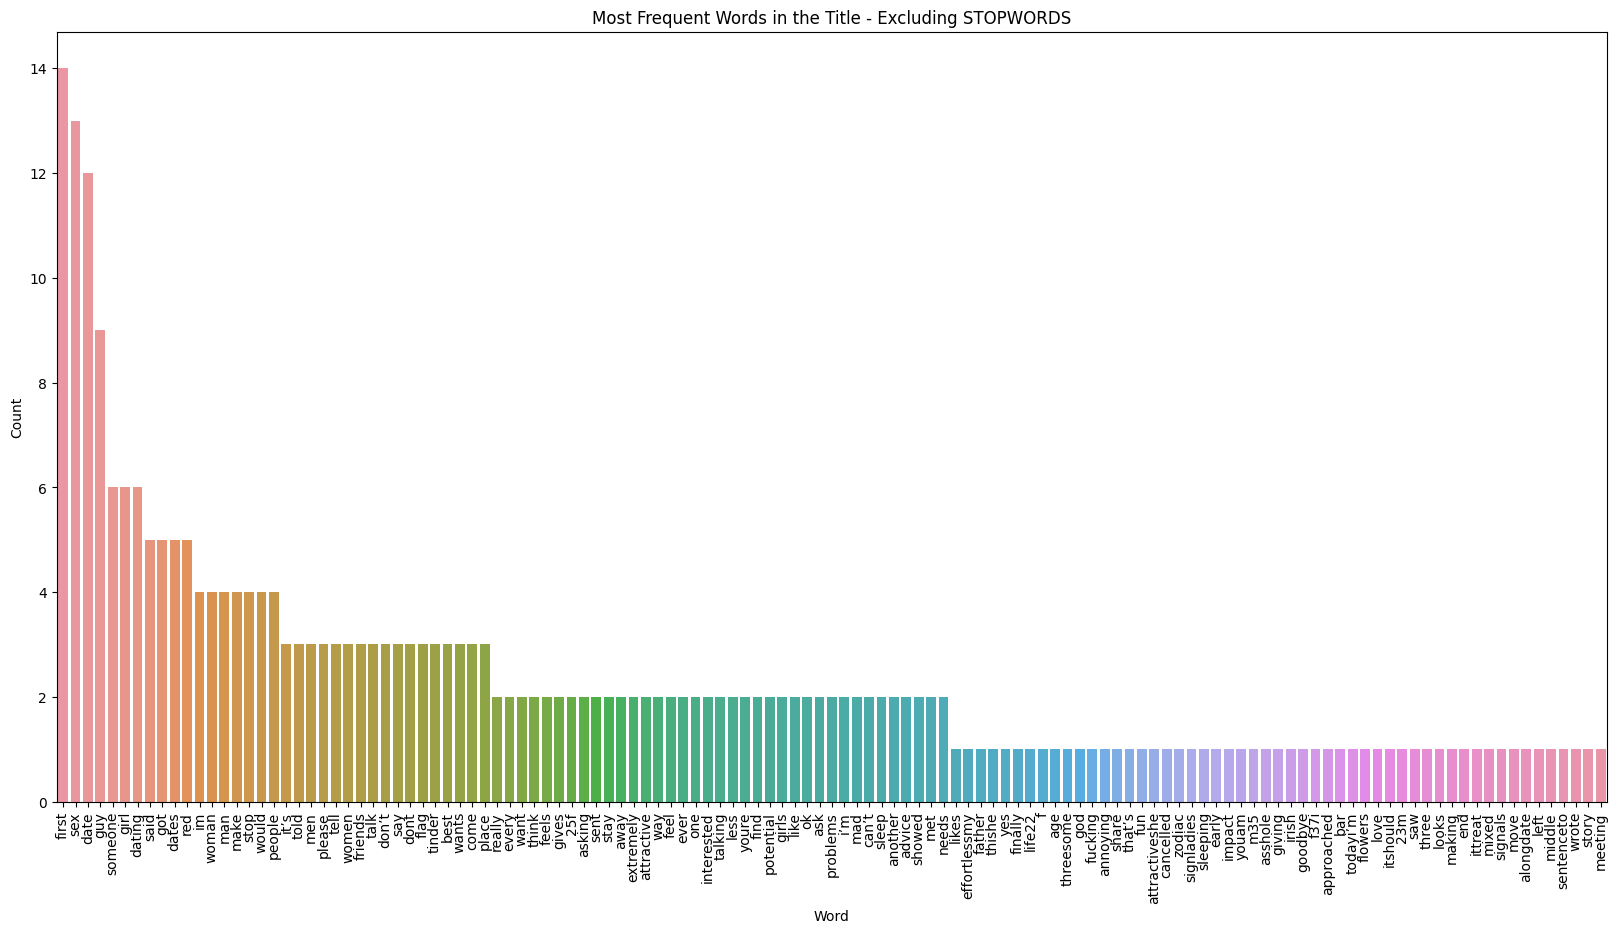

In [155]:
rf.plot_word_frequency(corpus_titles_top100_title_noStop, corpus_name="Title")

<AxesSubplot:title={'center':'Most Frequent Words in the Post Text - Excluding STOPWORDS'}, xlabel='Word', ylabel='Count'>

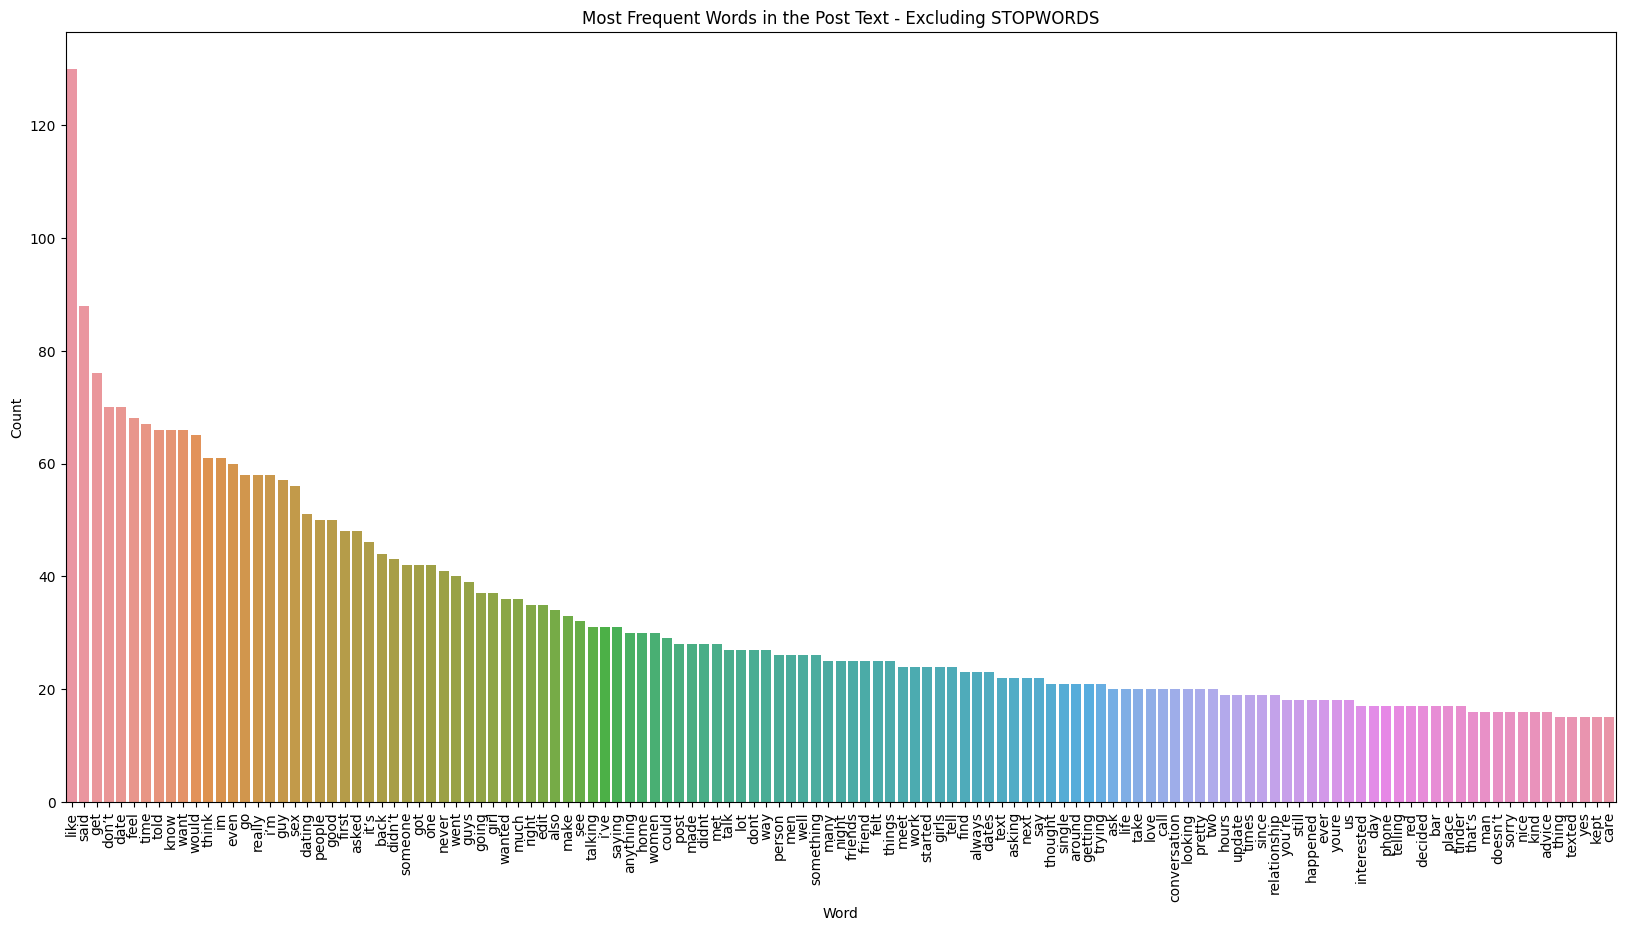

In [156]:
rf.plot_word_frequency(corpus_titles_top100_postText_noStop, corpus_name="Post Text")

<AxesSubplot:title={'center':'Most Frequent Words in the Body - Excluding STOPWORDS'}, xlabel='Word', ylabel='Count'>

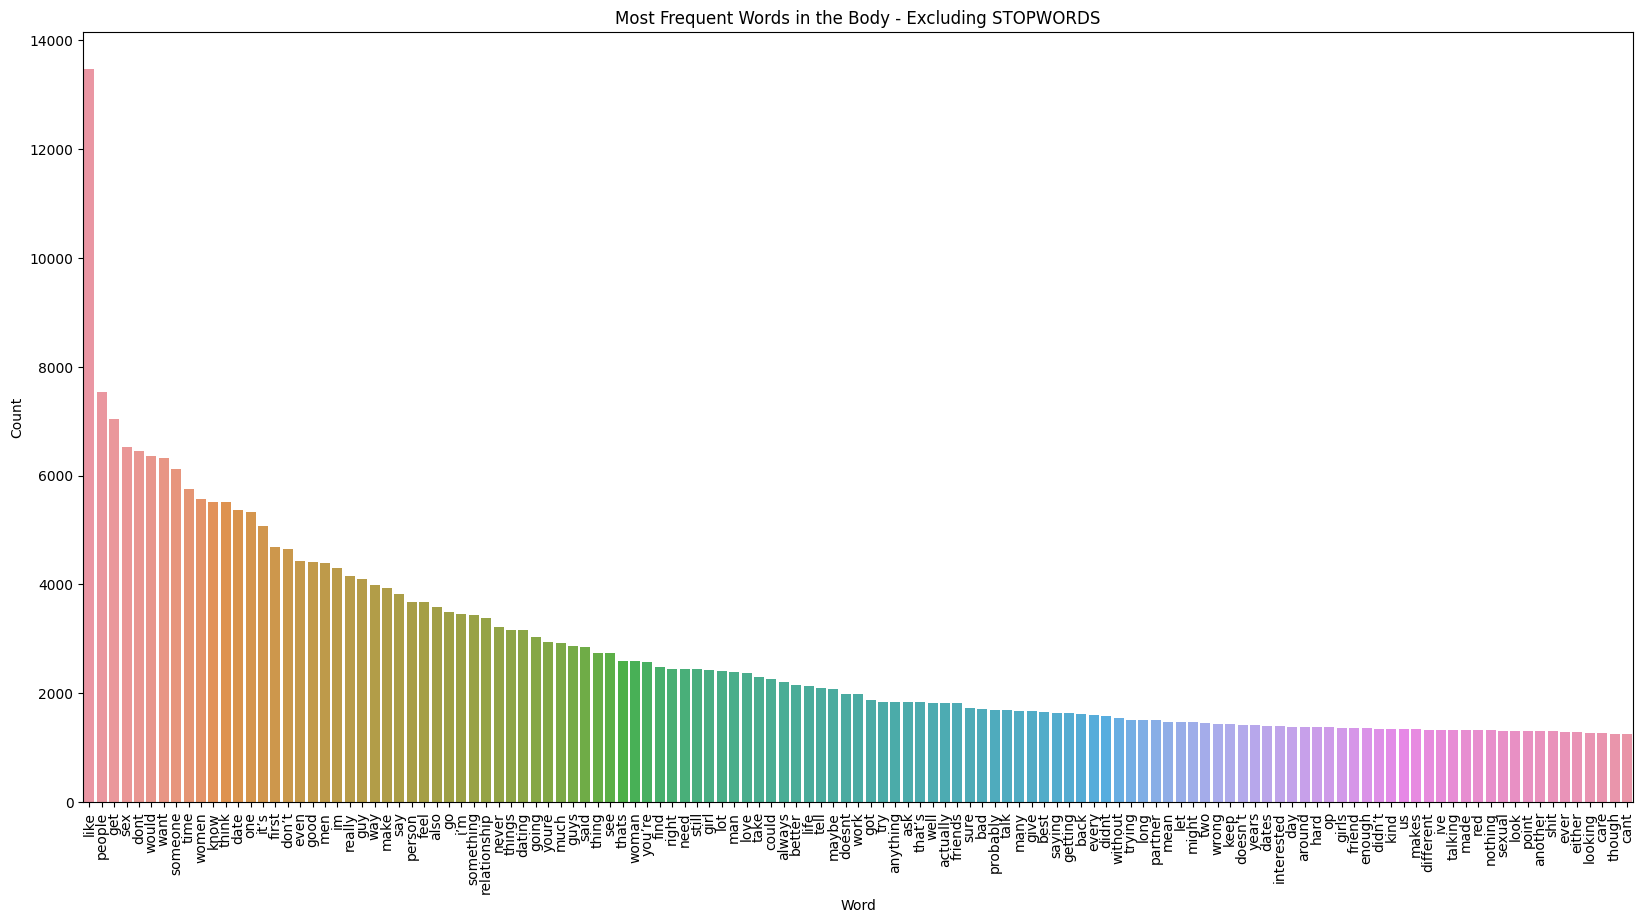

In [157]:
rf.plot_word_frequency(corpus_cleaned_title_body_noStop, corpus_name="Body")

### Lift Analysis to Sentiment Analysis

#### Lift Analysis

In [ ]:
# Dictionary with variations of words to 
varDict = {'dont': 'don\'t', 'im': 'I\'m', 'timryan': 'tim ryan', 'jd': 'jd vance', 'vance': 'jd vance'}

In [12]:
topics_sentences = ["Red flags on a first date", 
"Women having problem with men being too interested in sex",
"Sexual insecurities",
"Men focused on attractiveness",
"Difficulties surrounding dating"
]
topic_short = [i[:9] for i in topics_sentences]

#### Sentiment Analysis

In [158]:
topics_model = pd.read_excel("Topic_Modeling_Analysis.xlsx",index_col=0)

In [159]:
topics_model

,Title_Topic_1,Title_Topic_2,Title_Topic_3,Title_Topic_4,Title_Topic_5,Post_Text_Topic_1,Post_Text_Topic_2,Post_Text_Topic_3,Post_Text_Topic_4,Post_Text_Topic_5,Body_Topic_1,Body_Topic_2,Body_Topic_3,Body_Topic_4,Body_Topic_5
Rank,,,,,,,,,,,,,,,
1,date,woman,first,guy,women,like,like,like,date,said,like,like,women,sex,like
2,first,sex,date,men,dating,want,would,feel,get,guy,deleted,people,men,like,date
3,said,men,girl,want,guy,date,sex,dating,like,told,red,someone,people,want,time
4,red,reddit,would,attractive,difficult,dating,get,guys,sex,like,lol,relationship,like,date,would
5,sex,turn,lesser,every,thing,time,anything,first,want,asked,flag,know,think,first,get
6,got,dates,sex,please,whats,said,people,men,guy,even,get,don’t,don’t,dont,go
7,time,dating,think,think,man,would,said,people,think,want,don’t,feel,woman,think,first
8,3,stop,feel,22,extremely,know,know,im,really,im,please,get,dating,get,one
9,already,talk,situation,age,way,good,post,girl,back,think,sounds,person,man,time,years


In [160]:
analyzer = SentimentIntensityAnalyzer()
corpus_titles_top100_title
corpus_titles_top100_postText
corpus_cleaned_title_body_noStop

['welcome',
 'rdatingadvice',
 'please',
 'keep',
 'ruleshttpswwwredditcomrdatingadviceaboutrules',
 'rdatingadvice',
 'mind',
 'participating',
 'try',
 'best',
 'kind',
 'report',
 'rulebreaking',
 'behavior',
 'moderators',
 'using',
 'report',
 'button',
 'urgent',
 'send',
 'us',
 'messagehttpswwwredditcommessagecomposeto2fr2fdatingadvice',
 'rely',
 'user',
 'reports',
 'find',
 'rulebreaking',
 'behavior',
 'quickly',
 'thanks',
 'bot',
 'action',
 'performed',
 'automatically',
 'please',
 'contact',
 'moderators',
 'subredditmessagecomposetordatingadvice',
 'questions',
 'concernsone',
 'busier',
 'someone',
 'interesteddating',
 'effortless',
 'yes',
 'successful',
 'longterm',
 'relationship',
 'assuming',
 'that’s',
 'goal',
 'inevitable',
 'tribulations',
 'successful',
 'longterm',
 'relationship',
 'gone',
 'tough',
 'times',
 'arguments',
 'effective',
 'problem',
 'resolution',
 'longterm',
 'relationship',
 'seems',
 '“effortless”',
 'chances',
 'that’s',
 'facade',
 

In [125]:
df_titles_top100["Title"].values

100

In [161]:
def sentiment(series_text : pd.Series, series_topics : pd.Series):
    col_names = ["Content", "Word", "Negative", "Neutral", "Positive", "Compound"]
    data = np.array(col_names)
    analyzer = SentimentIntensityAnalyzer()
    for txt in series_text.values:
        txt = txt.lower()
        txt_box = txt.split()
        for part in txt_box:
            if part in series_topics.values:
                vs = analyzer.polarity_scores(txt)
                array = np.array(
                    [txt, part, vs["neg"], vs["neu"], vs["pos"], vs["compound"]]
                )
            else:
                array = np.array(
                    [txt, part, pd.NaT, pd.NaT, pd.NaT, pd.NaT]
                )
            data = np.row_stack((data,array))
        data = pd.DataFrame(data=data, columns=col_names)
        data.drop(index=0, inplace=True)
    return data

In [172]:
# Conduct sentiment analysis
    # Sentiment on titles
scored_title_topic_1 = sentiment(df_titles_top100["Title"], topics_model["Title_Topic_1"][:20])
scored_title_topic_2 = sentiment(df_titles_top100["Title"], topics_model["Title_Topic_2"][:20])
scored_title_topic_3 = sentiment(df_titles_top100["Title"], topics_model["Title_Topic_3"][:20])
scored_title_topic_4 = sentiment(df_titles_top100["Title"], topics_model["Title_Topic_4"][:20])
scored_title_topic_5 = sentiment(df_titles_top100["Title"], topics_model["Title_Topic_5"][:20])

In [173]:
    # Sentiment on post text
scored_postText_topic_1 = sentiment(df_titles_top100["Post Text"], topics_model["Post_Text_Topic_1"][:20])
scored_postText_topic_2 = sentiment(df_titles_top100["Post Text"], topics_model["Post_Text_Topic_2"][:20])
scored_postText_topic_3 = sentiment(df_titles_top100["Post Text"], topics_model["Post_Text_Topic_3"][:20])
scored_postText_topic_4 = sentiment(df_titles_top100["Post Text"], topics_model["Post_Text_Topic_4"][:20])
scored_postText_topic_5 = sentiment(df_titles_top100["Post Text"], topics_model["Post_Text_Topic_5"][:20])

In [174]:
    # Sentiment on body
scored_body_topic_1 = sentiment(df_cleaned_title["Body"], topics_model["Body_Topic_1"][:20])
scored_body_topic_2 = sentiment(df_cleaned_title["Body"], topics_model["Body_Topic_2"][:20])
scored_body_topic_3 = sentiment(df_cleaned_title["Body"], topics_model["Body_Topic_3"][:20])
scored_body_topic_4 = sentiment(df_cleaned_title["Body"], topics_model["Body_Topic_4"][:20])
scored_body_topic_5 = sentiment(df_cleaned_title["Body"], topics_model["Body_Topic_5"][:20])

KeyboardInterrupt: 

In [170]:
# Remove all rows (words) that do not have any sentiment score
    # Title
scored_title_topic_1.dropna(thresh=4, inplace=True)
scored_title_topic_2.dropna(thresh=4, inplace=True)
scored_title_topic_3.dropna(thresh=4, inplace=True)
scored_title_topic_4.dropna(thresh=4, inplace=True)
scored_title_topic_5.dropna(thresh=4, inplace=True)

    # Post Text
scored_postText_topic_1.dropna(thresh=4, inplace=True)
scored_postText_topic_2.dropna(thresh=4, inplace=True)
scored_postText_topic_3.dropna(thresh=4, inplace=True)
scored_postText_topic_4.dropna(thresh=4, inplace=True)
scored_postText_topic_5.dropna(thresh=4, inplace=True)

    # Body
scored_body_topic_1.dropna(thresh=4, inplace=True)
scored_body_topic_2.dropna(thresh=4, inplace=True)
scored_body_topic_3.dropna(thresh=4, inplace=True)
scored_body_topic_4.dropna(thresh=4, inplace=True)
scored_body_topic_5.dropna(thresh=4, inplace=True)

NameError: name 'scored_body_topic_1' is not defined

In [169]:
unique_title_content = np.array([
    len(scored_title_topic_1['Content'].unique()),
    len(scored_title_topic_2['Content'].unique()),
    len(scored_title_topic_3['Content'].unique()),
    len(scored_title_topic_4['Content'].unique()),
    len(scored_title_topic_5['Content'].unique())
])
print(unique_title_content)
unique_postText_content = np.array([
    len(scored_postText_topic_1['Content'].unique()),
    len(scored_postText_topic_2['Content'].unique()),
    len(scored_postText_topic_3['Content'].unique()),
    len(scored_postText_topic_4['Content'].unique()),
    len(scored_postText_topic_5['Content'].unique())
])
print(unique_postText_content)
unique_body_content = np.array([
    len(scored_body_topic_1['Content'].unique()),
    len(scored_body_topic_2['Content'].unique()),
    len(scored_body_topic_3['Content'].unique()),
    len(scored_body_topic_4['Content'].unique()),
    len(scored_body_topic_5['Content'].unique())
])
print(unique_body_content)

[93 93 93 93 93]
[99 99 99 99 99]


NameError: name 'scored_body_topic_1' is not defined

In [119]:
scored_title_topic_2

,Content,Negative,Neutral,Positive,Compound
1,i approached a guy at the bar today,nan,nan,nan,nan
2,i’m a woman who gives men flowers and they lov...,nan,nan,nan,nan
3,i’m a woman who gives men flowers and they lov...,nan,nan,nan,nan
4,i’m a woman who gives men flowers and they lov...,0.0,0.704,0.296,0.6369
5,i’m a woman who gives men flowers and they lov...,nan,nan,nan,nan
...,...,...,...,...,...
1177,guy told me i “should” check my cholesterol af...,nan,nan,nan,nan
1178,guy told me i “should” check my cholesterol af...,nan,nan,nan,nan
1179,guy told me i “should” check my cholesterol af...,nan,nan,nan,nan
1180,guy told me i “should” check my cholesterol af...,nan,nan,nan,nan
